In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def chebyshev_nodes(n):
    k = np.arange(1, n + 1)
    nodes = np.cos((2 * k - 1) * np.pi / (2 * n))
    return nodes

def lagrange_interpolation(x, nodes, values):
    result = 0.0
    for i in range(len(nodes)):
        term = values[i]
        for j in range(len(nodes)):
            if j != i:
                term = term * (x - nodes[j]) / (nodes[i] - nodes[j])
        result += term
    return result

def generate_chebyshev_interpolating_polynomial(n, f):
    nodes = chebyshev_nodes(n)
    values = f(nodes)

    def interpolating_polynomial(x):
        return lagrange_interpolation(x, nodes, values)

    return interpolating_polynomial

def max_error(n, f, interpolating_polynomial):
    x_vals = np.linspace(-1, 1, 1000)
    true_values = f(x_vals)
    interpolated_values = interpolating_polynomial(x_vals)
    error = np.max(np.abs(true_values - interpolated_values))
    return error

def f(x):
    return np.where(x >= 0, 1, -1)

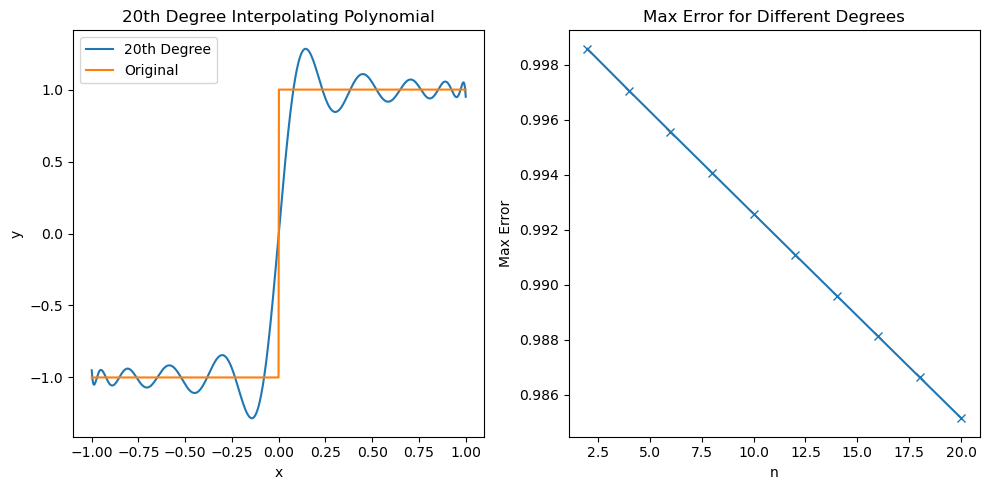

In [3]:
x_vals = np.linspace(-1, 1, 1000)
interpolated_y_val = []

for n in range(2,22,2):
    interpolating_polynomial = generate_chebyshev_interpolating_polynomial(n, f)
    y_vals = interpolating_polynomial(x_vals)
    interpolated_y_val.append(y_vals)

# 20th degree Interpolating Polynomial Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.title('20th Degree Interpolating Polynomial')
plt.plot(x_vals, interpolated_y_val[-1], label = '20th Degree')

y_vals_original = f(x_vals)
plt.plot(x_vals, y_vals_original, label='Original')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Max Error Plot
plt.subplot(1, 2, 2)
plt.title('Max Error for Different Degrees')

errors = [max_error(n, f, generate_chebyshev_interpolating_polynomial(n, f)) for n in range(2,22,2)]
plt.plot(range(2,22,2), errors, 'x-')

plt.xlabel('n')
plt.ylabel('Max Error')

plt.tight_layout()
plt.show()
